In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from src.political_party_analysis.loader import DataLoader
from src.political_party_analysis.dim_reducer import DimensionalityReducer
from src.political_party_analysis.visualization import scatter_plot
from src.political_party_analysis.estimator import DensityEstimator

In [2]:
df= pd.read_stata('data/CHES2019V3.dta')
# df.head()
df.set_index(["party_id", "party", "country"], inplace=True)
# df.columns

In [3]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [eastwest, eu_position, eu_position_sd, eu_salience, eu_dissent, eu_blur, eu_cohesion, eu_foreign, eu_intmark, eu_budgets, eu_asylum, lrgen, lrecon, lrecon_sd, lrecon_salience, lrecon_dissent, lrecon_blur, galtan, galtan_sd, galtan_salience, galtan_dissent, galtan_blur, immigrate_policy, immigrate_salience, immigrate_dissent, multiculturalism, multicult_salience, multicult_dissent, redistribution, redist_salience, environment, enviro_salience, spendvtax, deregulation, econ_interven, civlib_laworder, sociallifestyle, religious_principles, ethnic_minorities, nationalism, urban_rural, protectionism, regions, russian_interference, anti_islam_rhetoric, people_vs_elite, antielite_salience, corrupt_salience, members_vs_leadership, eu_econ_require, eu_political_require, eu_googov_require]
Index: []

[0 rows x 52 columns]


In [4]:
df.fillna(df.mean(), inplace=True)
df.head()
# df.shape

,,,eastwest,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,...,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_econ_require,eu_political_require,eu_googov_require
party_id,party,country,,,,,,,,,,,,,,,,,,,,,
102.0,PS,be,1.0,6.083333,0.288675,4.272727,2.75,2.166667,6.250,5.444445,4.777778,4.250,...,6.000000,0.111111,2.111111,3.363636,2.181818,1.909091,7.500000,4.889286,4.063889,4.417857
103.0,SP/SPA,be,1.0,6.000000,0.426401,4.181818,2.50,1.714286,6.000,5.444445,4.777778,4.625,...,5.333333,0.111111,2.222222,3.545455,2.090909,1.636364,6.818182,4.889286,4.063889,4.417857
104.0,ECOLO,be,1.0,6.583333,0.514929,4.818182,2.50,1.428571,6.000,5.666667,4.777778,4.750,...,6.166667,0.111111,2.888889,5.636364,2.454545,2.363636,3.909091,4.889286,4.063889,4.417857
105.0,AGALEV,be,1.0,6.583333,0.514929,4.818182,2.50,1.285714,5.875,5.666667,4.777778,4.750,...,6.083333,0.111111,2.777778,5.636364,2.363636,2.000000,4.000000,4.889286,4.063889,4.417857
106.0,PRL/MR,be,1.0,6.500000,0.674200,5.090909,2.00,1.714286,5.500,5.777778,6.000000,5.500,...,6.416667,0.111111,2.333333,4.636364,1.727273,1.636364,7.000000,4.889286,4.063889,4.417857


In [5]:
# Reduce the data to 2D
dimensionality_red= DimensionalityReducer(data= df, model= None, n_components= 2)
reduced_data = dimensionality_red.reduce_to_2d()

    # Print the result
# print("Reduced Data:", reduced_data)

/Users/debdeeppaul/Documents/JobSwitch/TW2412/datascientist-politicalparties-python/src/political_party_analysis/visualization.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  splot.legend()


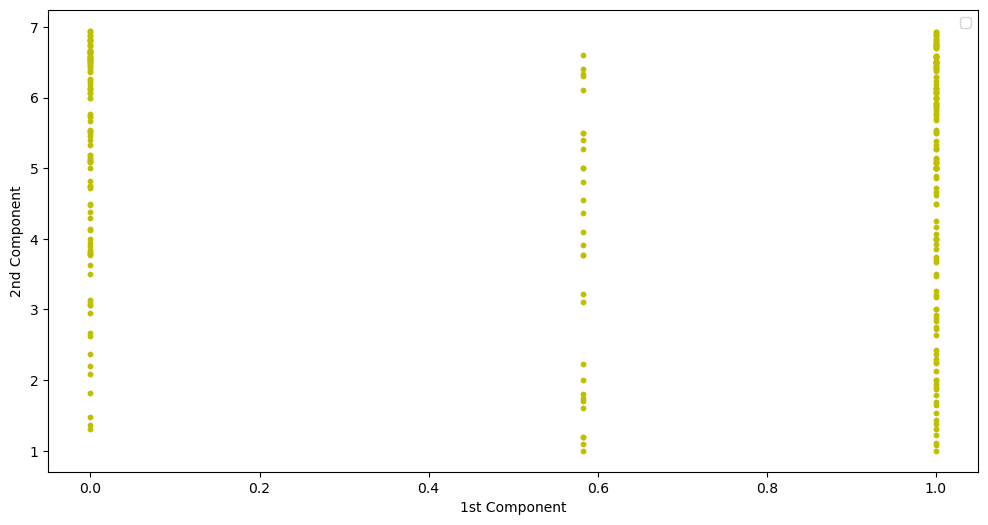

In [6]:
scatter_plot(
    transformed_data= df,    
    color= 'y',
    size= 10,
    splot= None,
    label= None)
plt.show()

In [7]:
density_estimator= DensityEstimator(reduced_data)
kde_model = density_estimator.model_distribution(bandwidth=1.0)
# Step 2: Randomly sample 10 parties
sampled_parties = density_estimator.sample_parties(kde_model, n_samples=10)
# print("Sampled Parties (Reduced Space):\n", sampled_parties)

# original_space= density_estimator.map_to_original_space(df)

In [8]:
def encode_continuous_to_classes(series, bins, labels=None):
    """
    Encodes a continuous variable into discrete classes.
    
    Parameters:
        series (pd.Series): The continuous variable to encode.
        bins (list): A list of bin edges. For example, [1, 4, 7, 10] creates three bins: 1-4, 4-7, and 7-10.
        labels (list, optional): A list of labels for the bins. If None, the bins are labeled with integers.
        
    Returns:
        pd.Series: A new series with the encoded classes.
    """
    if labels is None:
        labels = range(len(bins) - 1)
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)

# Define the bins and optional labels
bins = [1, 4, 7, 10]  # 1-4, 4-7, 7-10
labels = ['Low', 'Medium', 'High']

orientation= encode_continuous_to_classes(df['lrgen'], bins, labels= labels)
# print(orientation)


In [9]:
df['Orientation']= orientation
df= df.drop(['lrgen'], axis=1)

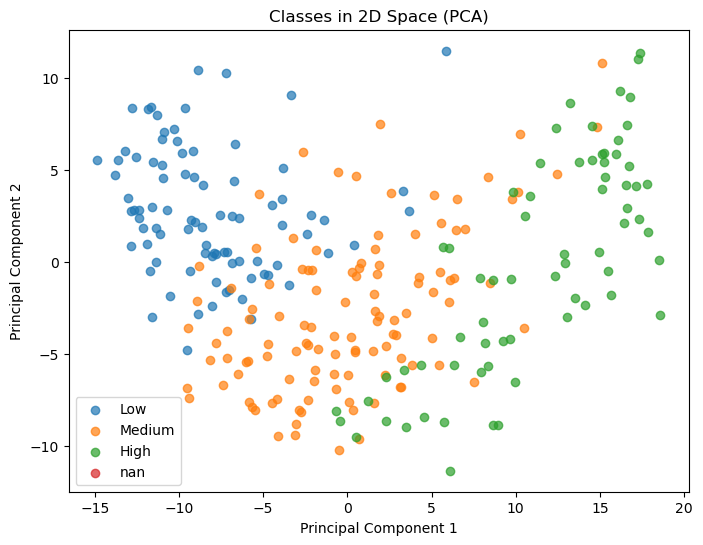

In [10]:

# Convert to DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['class'] = orientation.values

# Plot the classes in 2D space
plt.figure(figsize=(8, 6))
for cls in reduced_df['class'].unique():
    subset = reduced_df[reduced_df['class'] == cls]
    plt.scatter(subset['PC1'], subset['PC2'], label=cls, alpha=0.7)

plt.title('Classes in 2D Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [11]:
recovered_parties= dimensionality_red.map_to_original_space(sampled_parties)
print(recovered_parties)

[[ 0.52350946  2.47481575  1.0741189   5.23226361  2.58521625  4.37827111
   4.43983811  2.09160429  3.2948979   1.93565316  1.75924225  6.82602218
   4.66826745  1.73337245  5.39420754  2.89541904  4.76124452  8.51466768
   1.34095315  7.02871694  2.2690303   2.37422785  8.58539835  7.89419554
   1.56080563  8.55367994  6.99151249  1.48293784  4.12901011  5.86251281
   6.84937946  2.88945399  4.54288748  4.04624286  3.78108154  8.16154476
   8.01183798  6.52087191  7.76037765  8.81704407  6.51451716  7.92110562
   5.61711069  2.75847716  6.25562281  6.4340511   7.82479857  4.99207156
   8.4604984   4.87242528  4.0199125   4.37832065]
 [ 0.62804764  7.2160258   0.62290602  6.55522369  2.5500685   2.40616143
   6.27706793  5.86552287  6.83621291  5.47479085  5.79683013  4.0116854
   5.40078089  0.77352297  7.18141794  2.95388605  2.59546541  1.87446118
   1.4843634   5.52349452  3.25909722  3.4071692   2.79355173  4.02258298
   3.78226318  2.72704346  4.0747584   3.49654307  4.78625285 

In [12]:
df_orientation= pd.DataFrame(data= orientation)
# df_orientation.to_csv('parties.csv')
df_orientation.index

MultiIndex([( 102.0,      'PS',  'be'),
            ( 103.0,  'SP/SPA',  'be'),
            ( 104.0,   'ECOLO',  'be'),
            ( 105.0,  'AGALEV',  'be'),
            ( 106.0,  'PRL/MR',  'be'),
            ( 107.0, 'VLD/PVV',  'be'),
            ( 108.0, 'PSC/CDH',  'be'),
            ( 109.0,     'CDV',  'be'),
            ( 110.0,  'VU/NVA',  'be'),
            ( 112.0,      'VB',  'be'),
            ...
            (4008.0,  'KINHMA', 'cyp'),
            (4009.0,    'ELAM', 'cyp'),
            (4501.0,      'Sj', 'ice'),
            (4502.0,   'Graen', 'ice'),
            (4503.0,       'F', 'ice'),
            (4504.0,       'M', 'ice'),
            (4505.0,     'Sam', 'ice'),
            (4506.0,      'Pi', 'ice'),
            (4507.0,       'V', 'ice'),
            (4508.0,     'FIF', 'ice')],
           names=['party_id', 'party', 'country'], length=277)

In [13]:
# def plot_finnish_parties(transformed_data: pd.DataFrame, splot: plt.subplot = None):
#     """
#     Plots Finnish parties on a 2D scatter plot based on the transformed data.

#     Args:
#         transformed_data: DataFrame containing the transformed data with indices ['party_id', 'party', 'country'] and 'lrgen' as the target variable.
#         splot: Optional subplot object to use for plotting. If None, a new figure is created.

#     Returns:
#         The created subplot object.
#     """

#     if splot is None:
#         fig, splot = plt.subplots()

#     # Define Finnish party groups and their colors
#     finnish_parties = [
#     (("fin", "r"), [("105", "AGALEV", "be"), ("106", "PRL/MR", "be"), ("107", "VLD/VW", "be")]),
#     (("fin", "g"), [("102", "PS", "be"), ("103", "SP/SPA", "be"), ("104", "ECOLO", "be")]),
#     (("fin", "b"), [("108", "PSC/CVDH", "be"), ("109", "CD&V", "be"), ("110", "VU/NVA", "be")]),
#     (("fin", "k"), [("111", "VB", "be"), ("112", "PVDA-PTB", "be")])
# ]
#     # Filter the transformed data to include only Finnish parties
#     finnish_data = transformed_data[transformed_data.index.isin([party_group[1] for party_group in finnish_parties for party in party_group[1]])]


#     # Create a dictionary to map party names to their corresponding group color
#     party_colors = {}
#     for party_group in finnish_parties:
#         for party in party_group[0]['partiy']:
#             party_colors[party] = party_group[0]['color']

#     # Plot the Finnish parties with their respective colors
#     for party, color in party_colors.items():
#         party_data = finnish_data.loc[party]
#         splot.scatter(party_data[0], party_data[1], color=color, label=party)

#     # Set plot labels and title
#     splot.set_xlabel("Dimension 1")
#     splot.set_ylabel("Dimension 2")
#     splot.set_title("Finnish Parties in 2D Space")
#     splot.legend()

#     return splot

# # Example usage:
# # Assuming 'transformed_data' is your DataFrame with indices ['party_id', 'party', 'country'] and 'Lrgen' as the target variable
# plot_finnish_parties(df_orientation)
# plt.show()

In [14]:
# # Assuming `features` is a DataFrame or NumPy array with your data
# # and `targets` is a NumPy array or Series containing class labels.

# # Replace these with your actual data
# # Example: features = pd.DataFrame(...), targets = np.array(...)
# features = np.random.rand(100, 20)  # Example data: 100 samples, 20 features
# targets = np.random.randint(0, 10, size=100)  # Example targets: 10 classes

# # Convert features to a NumPy array if it's not already
# if isinstance(features, pd.DataFrame):
#     features = features.values

# # Use PyMDE to reduce to 2D
# mde = pymde.preserve_neighbors(features, embedding_dim=2)  # Preserve neighborhood structure
# embedding = mde.embed()

# # Create a scatter plot
# plt.figure(figsize=(10, 8))
# colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Generate a color map for 10 classes

# for class_label in np.unique(targets):
#     plt.scatter(
#         embedding[targets == class_label, 0],  # X-coordinates
#         embedding[targets == class_label, 1],  # Y-coordinates
#         label=f"Class {class_label}",
#         color=colors[class_label],
#         alpha=0.7,
#         edgecolor="k"
#     )

# plt.title("2D Visualization of Features")
# plt.xlabel("Dimension 1")
# plt.ylabel("Dimension 2")
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# # import pymde
# # Example: features = pd.DataFrame(...), targets = np.array(...)
# features = df.drop(['Orientation'], axis=1)  # Example data: 100 samples, 20 features
# targets = orientation.values # Example targets: 10 classes

# # Convert features to a NumPy array if it's not already
# if isinstance(features, pd.DataFrame):
#     features = features.values

# # Use PyMDE to reduce to 2D
# mde = pymde.preserve_neighbors(features, embedding_dim=2)  # Preserve neighborhood structure
# embedding = mde.embed()

# # Create a scatter plot
# plt.figure(figsize=(10, 8))
# colors = plt.cm.tab10(np.linspace(0, 1, 3))  # Generate a color map for 10 classes

# for class_label in np.unique(targets):
#     plt.scatter(
#         embedding[targets == class_label, 0],  # X-coordinates
#         embedding[targets == class_label, 1],  # Y-coordinates
#         label=f"Class {class_label}",
#         color=colors[class_label],
#         alpha=0.7,
#         edgecolor="k"
#     )

# plt.title("2D Visualization of Features")
# plt.xlabel("Dimension 1")
# plt.ylabel("Dimension 2")
# plt.legend()
# plt.grid(True)
# plt.show()